In [1]:
import sys
sys.path.append('../scripts')
sys.path.append('../src')

from data_prep import load_stock_data
from technical_analysis import calculate_technical_indicators
from technical_visualization import plot_technical_indicators
import os

In [2]:
os.chdir('..')  # Change to project root where data files are
files = ["AAPL.csv", "GOOG.csv", "MSFT.csv", "AMZN.csv", "NVDA.csv", "META.csv"]
stocks = load_stock_data(files)

print("Stocks loaded:")
for symbol, df in stocks.items():
    print(f"{symbol}: {df.shape}")


Stocks loaded:
AAPL: (3774, 6)
GOOG: (3774, 6)
MSFT: (3774, 6)
AMZN: (3774, 6)
NVDA: (3774, 6)
META: (2923, 6)


In [3]:
for symbol, df in stocks.items():
    print(f"Calculating technical indicators for {symbol}...")
    stocks[symbol] = calculate_technical_indicators(df)

# Show results for AAPL
print("\nAAPL with technical indicators:")
print(stocks["AAPL"][['Date', 'Close', 'SMA_20', 'RSI', 'MACD']].tail())

Calculating technical indicators for AAPL...
Calculating technical indicators for GOOG...
Calculating technical indicators for MSFT...
Calculating technical indicators for AMZN...
Calculating technical indicators for NVDA...
Calculating technical indicators for META...

AAPL with technical indicators:
           Date       Close      SMA_20        RSI      MACD
3769 2023-12-22  191.788757  191.856618  54.672784  2.633141
3770 2023-12-26  191.243912  192.018094  53.090049  2.304751
3771 2023-12-27  191.342972  192.154308  53.354446  2.029104
3772 2023-12-28  191.768951  192.362839  54.540999  1.823998
3773 2023-12-29  190.728775  192.490633  51.121347  1.559539


Creating technical analysis plots for AAPL...


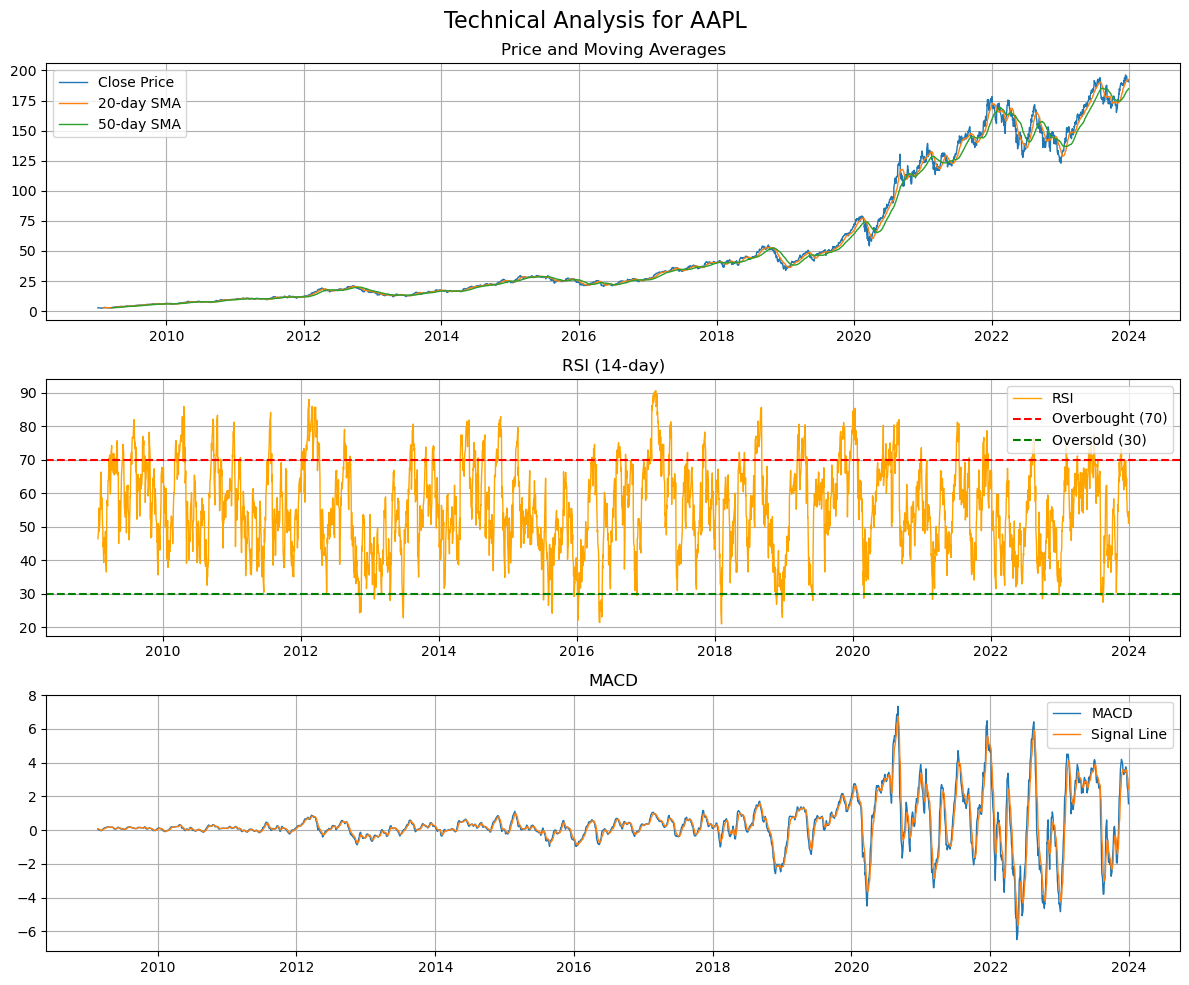

Creating technical analysis plots for GOOG...


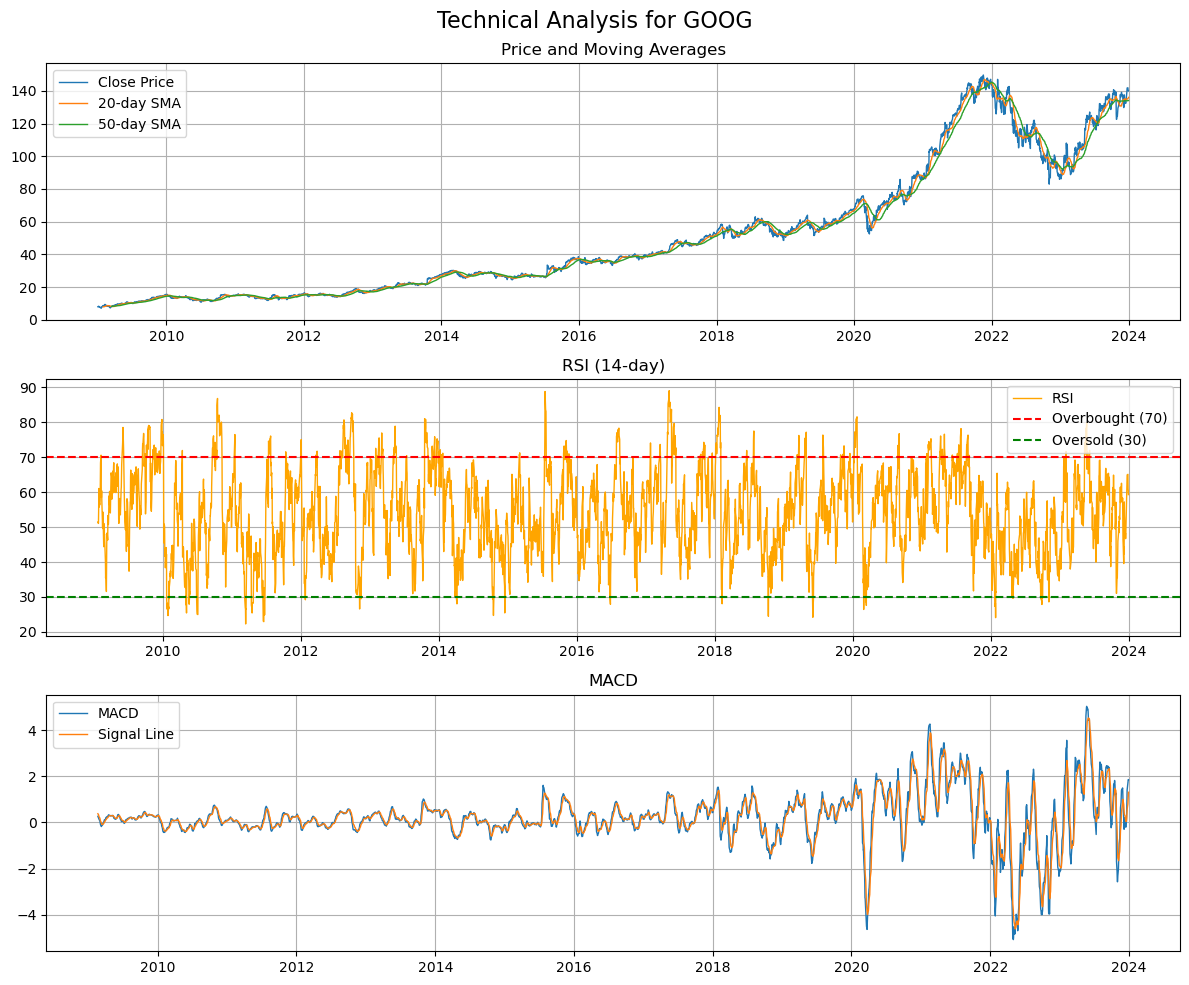

Creating technical analysis plots for MSFT...


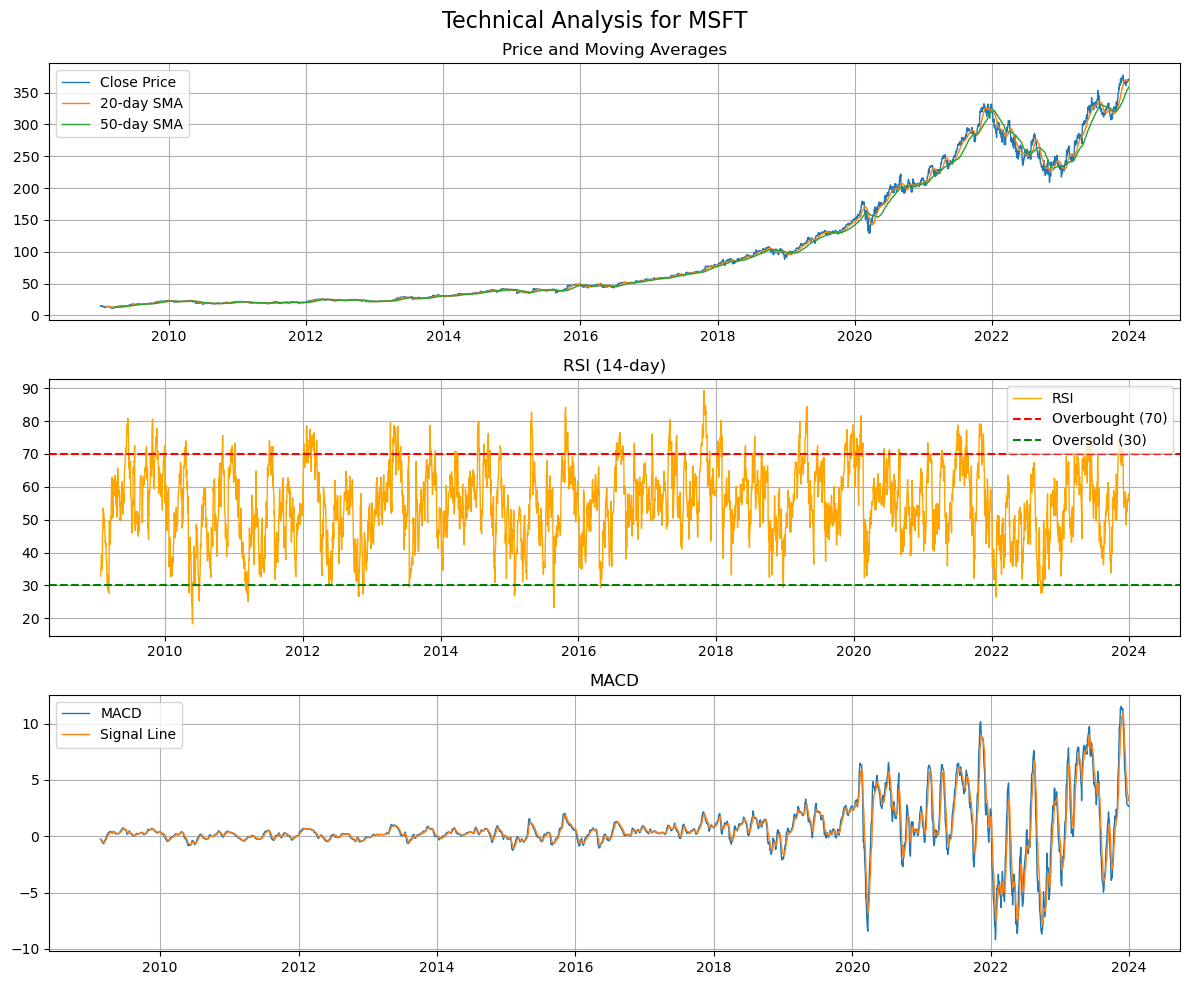

Creating technical analysis plots for AMZN...


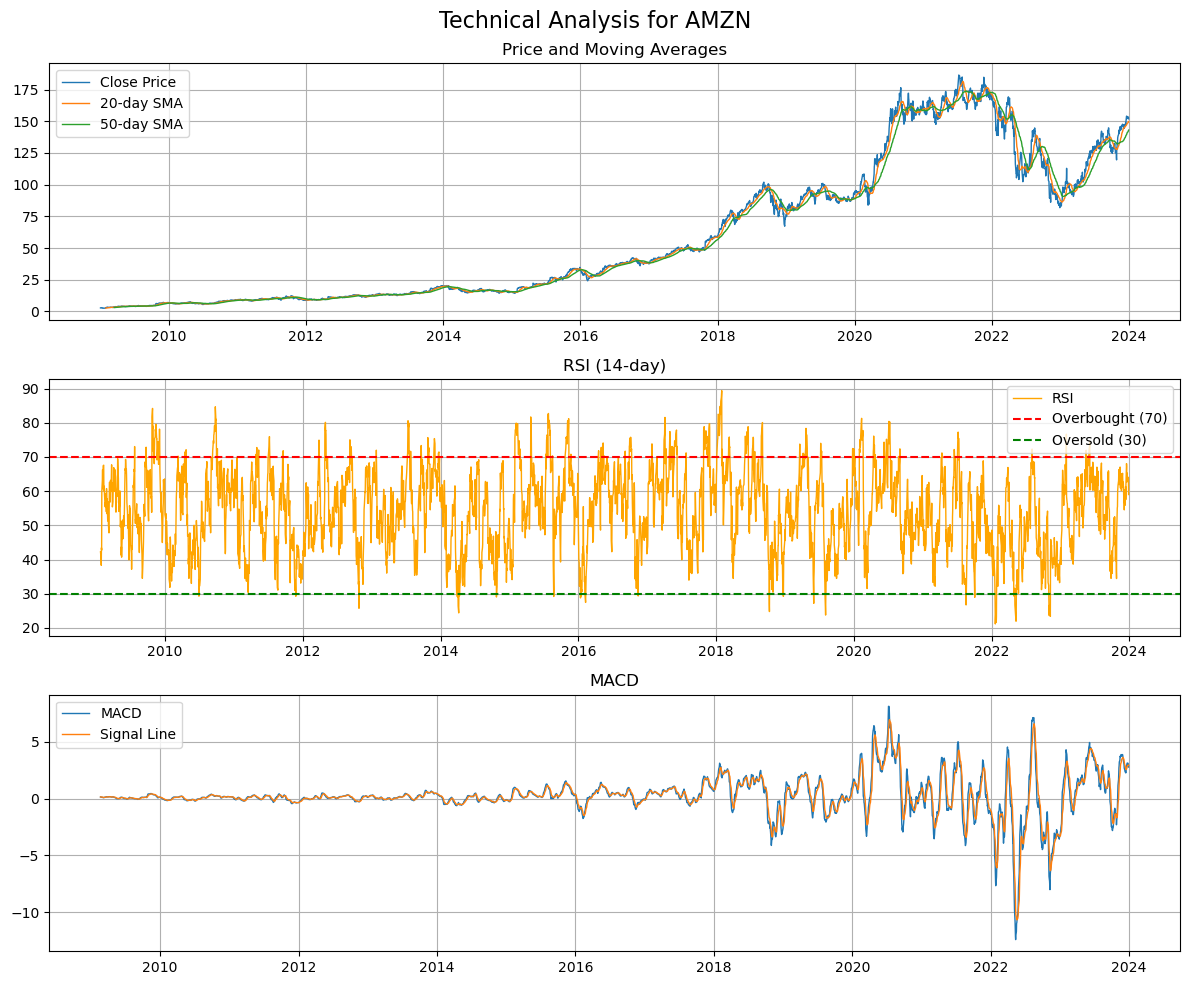

Creating technical analysis plots for NVDA...


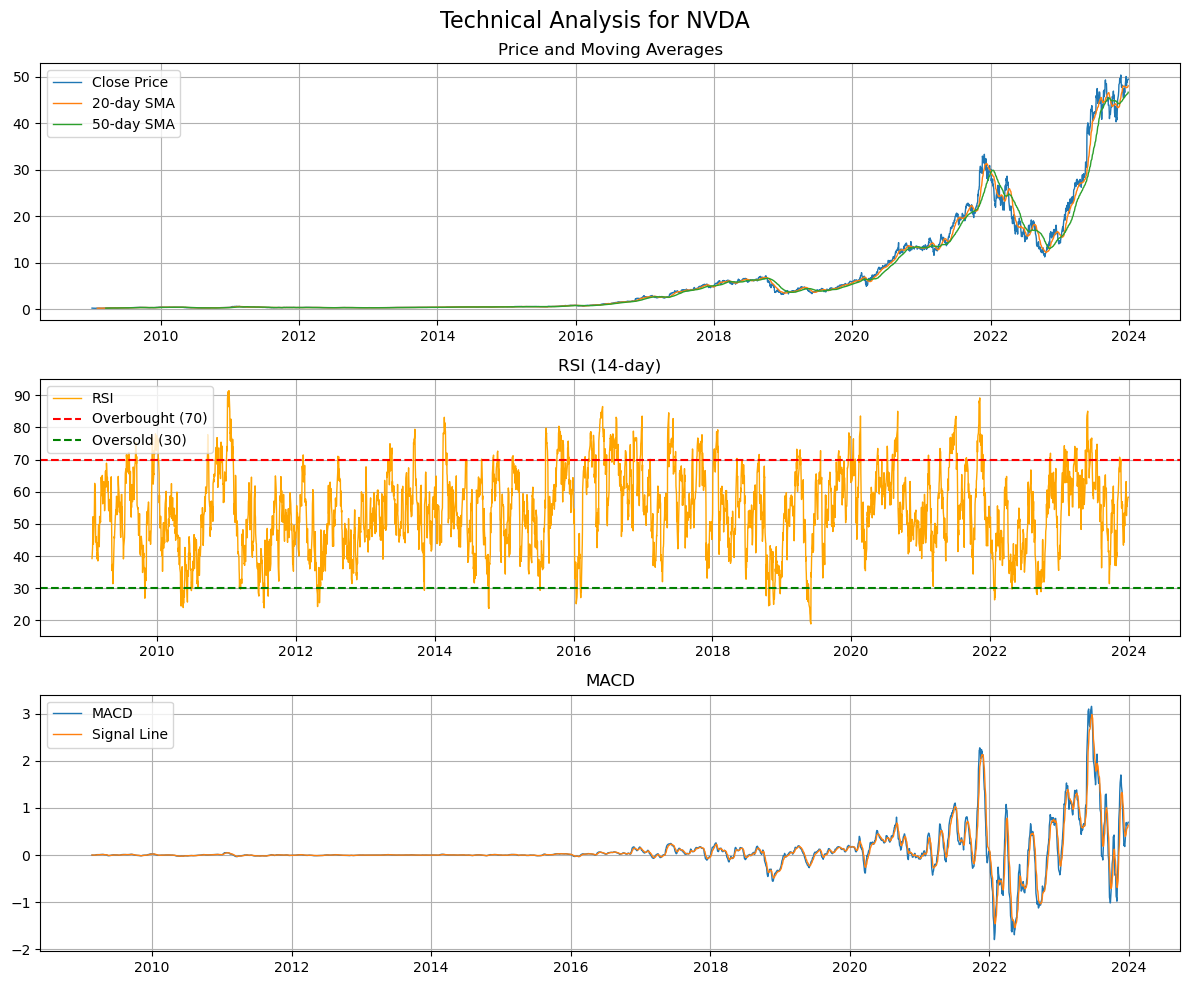

Creating technical analysis plots for META...


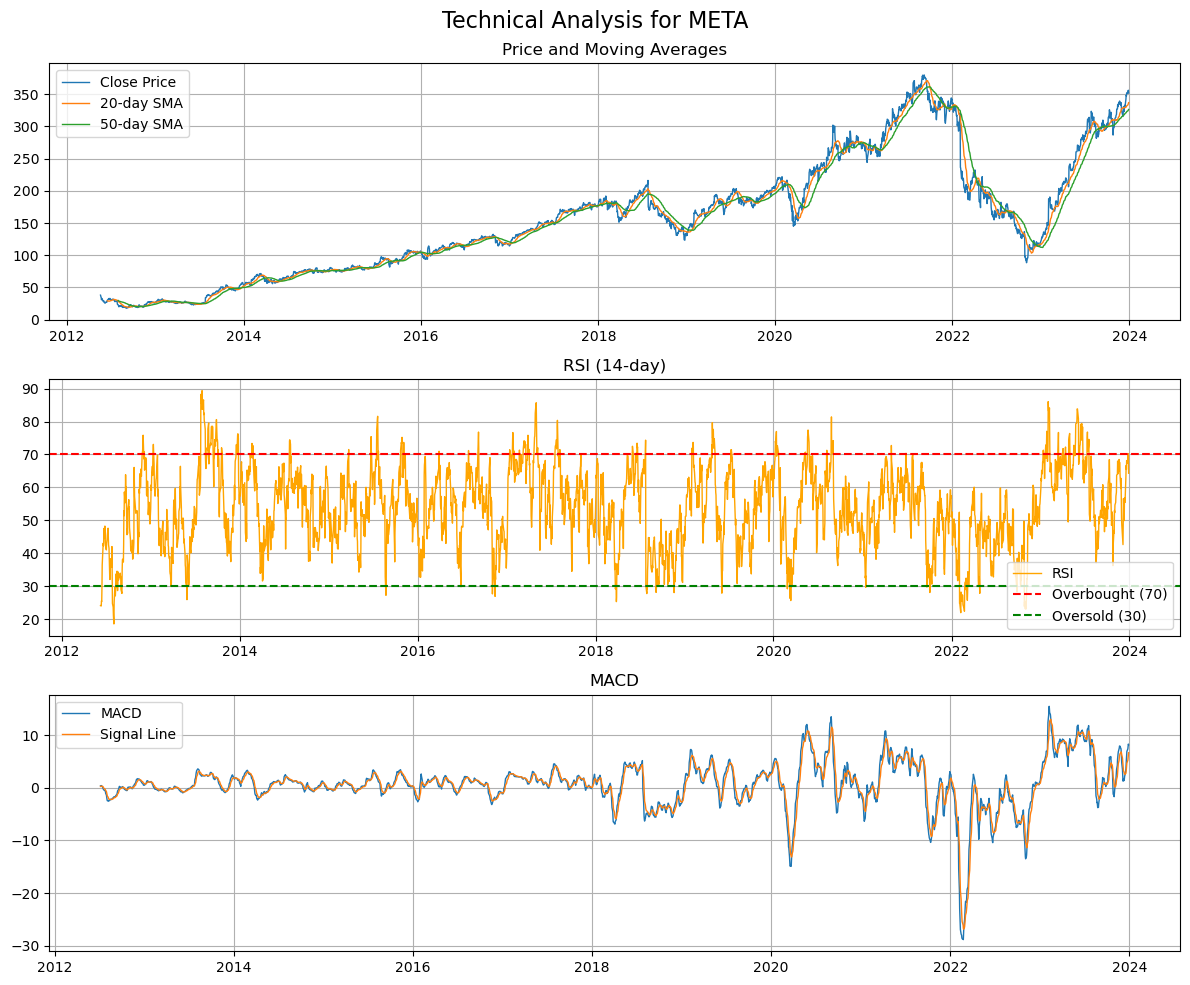

All visualizations completed! Check the outputs/ folder.


In [4]:
import matplotlib.pyplot as plt

# Create outputs directory
os.makedirs('outputs', exist_ok=True)

# Plot for each stock
for symbol in stocks.keys():
    print(f"Creating technical analysis plots for {symbol}...")
    plot_technical_indicators(stocks, symbol)

print("All visualizations completed! Check the outputs/ folder.")

In [ ]:
from pynance_analysis import calculate_pynance_metrics


for symbol, df in stocks.items():
    print(f"Calculating PyNance metrics for {symbol}...")
    stocks[symbol] = calculate_pynance_metrics(df)

# Show PyNance metrics for AAPL
print("\nAAPL with PyNance metrics:")
print(stocks["AAPL"][['Date', 'Close', 'daily_volatility', 'price_momentum', 'volume_ratio']].tail())

Calculating PyNance metrics for AAPL...
Calculating PyNance metrics for GOOG...
Calculating PyNance metrics for MSFT...
Calculating PyNance metrics for AMZN...
Calculating PyNance metrics for NVDA...
Calculating PyNance metrics for META...

AAPL with PyNance metrics:
           Date       Close  daily_volatility  price_momentum  volume_ratio
3769 2023-12-22  191.788757          0.144005        1.910828      0.687810
3770 2023-12-26  191.243912          0.144498        1.717700      0.541258
3771 2023-12-27  191.342972          0.144240        1.444337      0.891944
3772 2023-12-28  191.768951          0.142446        2.223159      0.636861
3773 2023-12-29  190.728775          0.144101        1.358260      0.802725


Creating comprehensive analysis for AAPL...


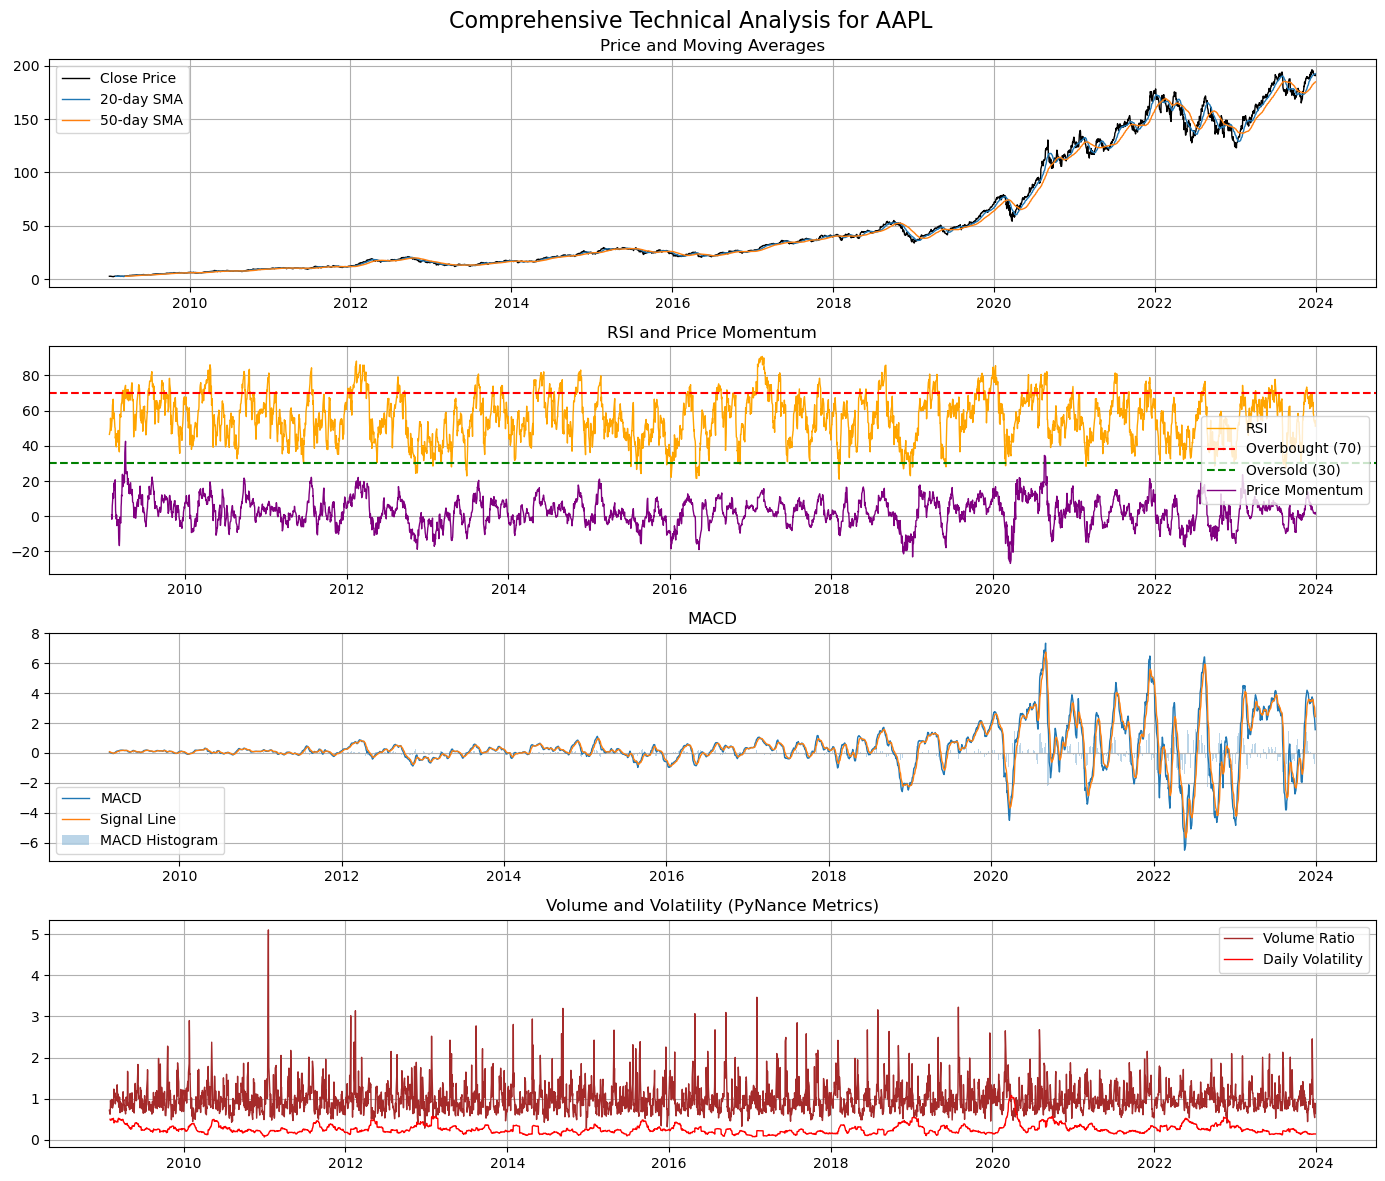

Creating comprehensive analysis for GOOG...


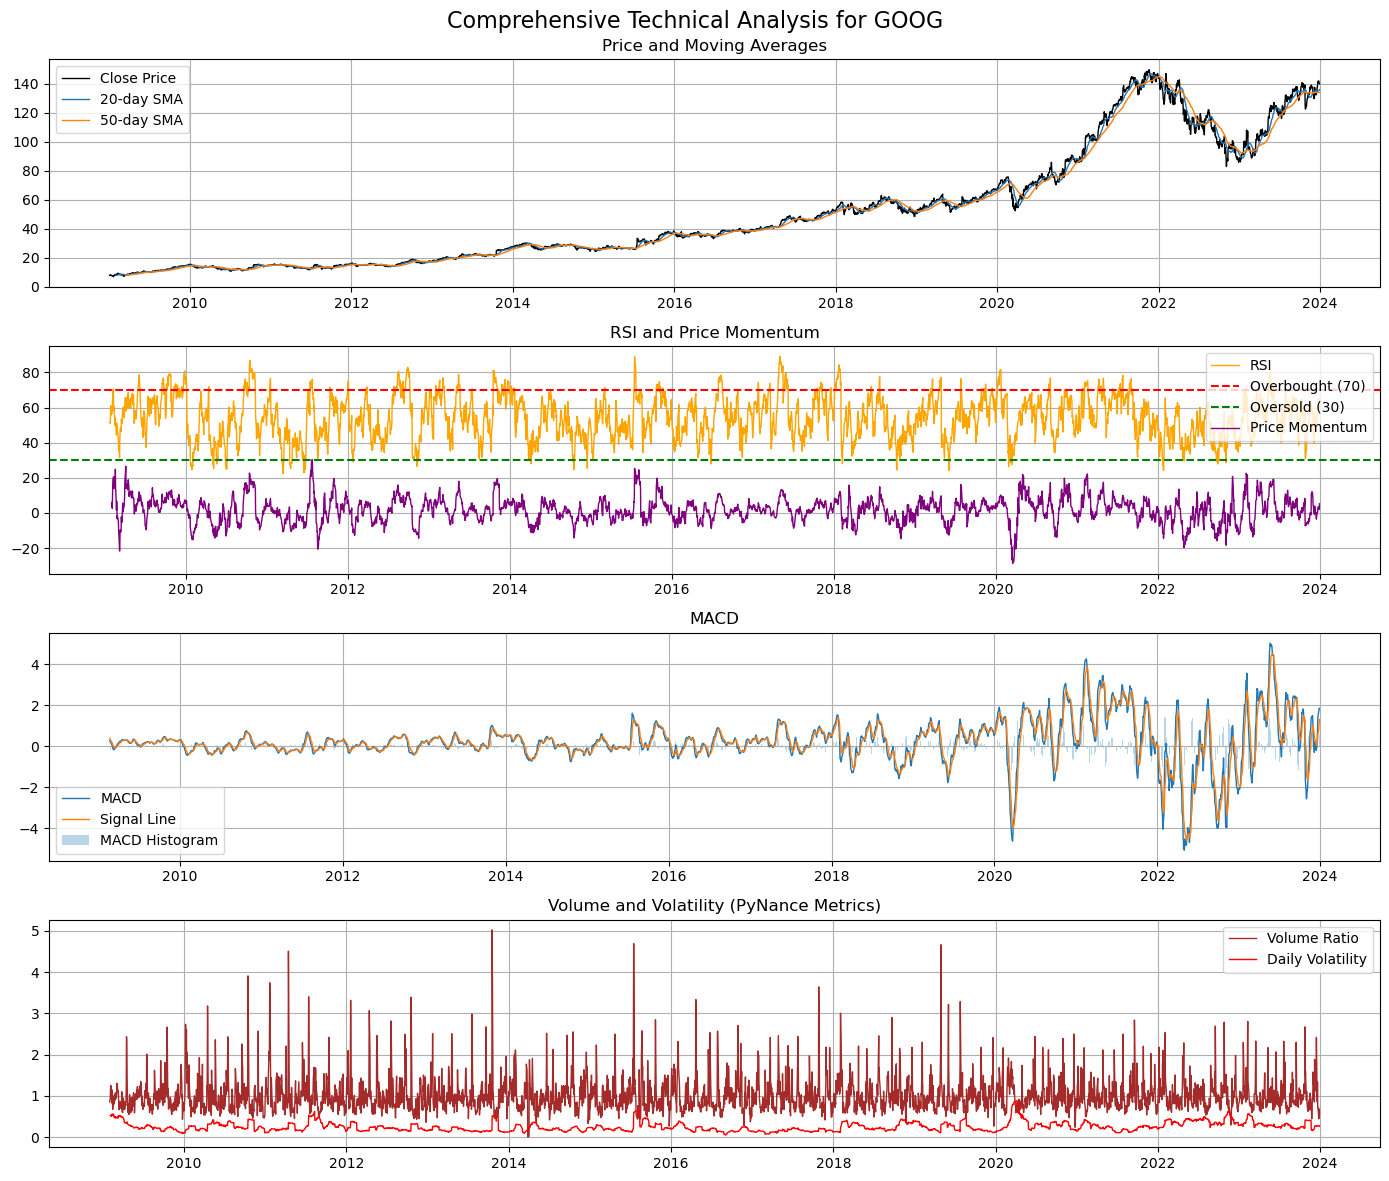

Creating comprehensive analysis for MSFT...


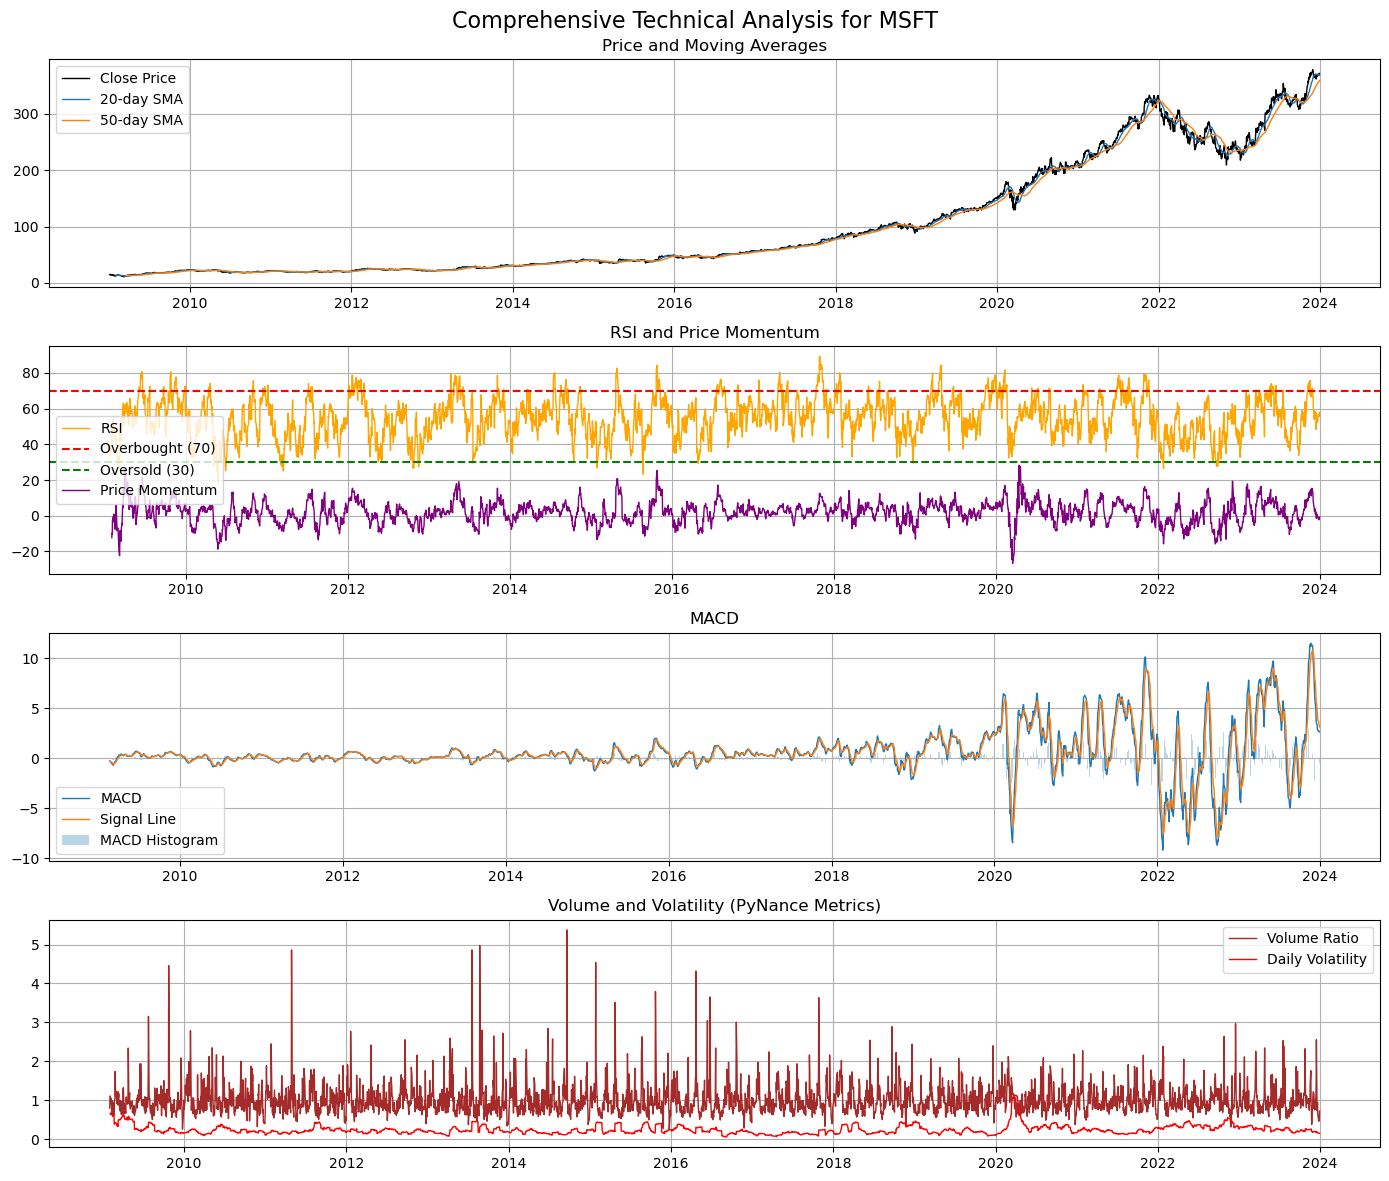

Creating comprehensive analysis for AMZN...


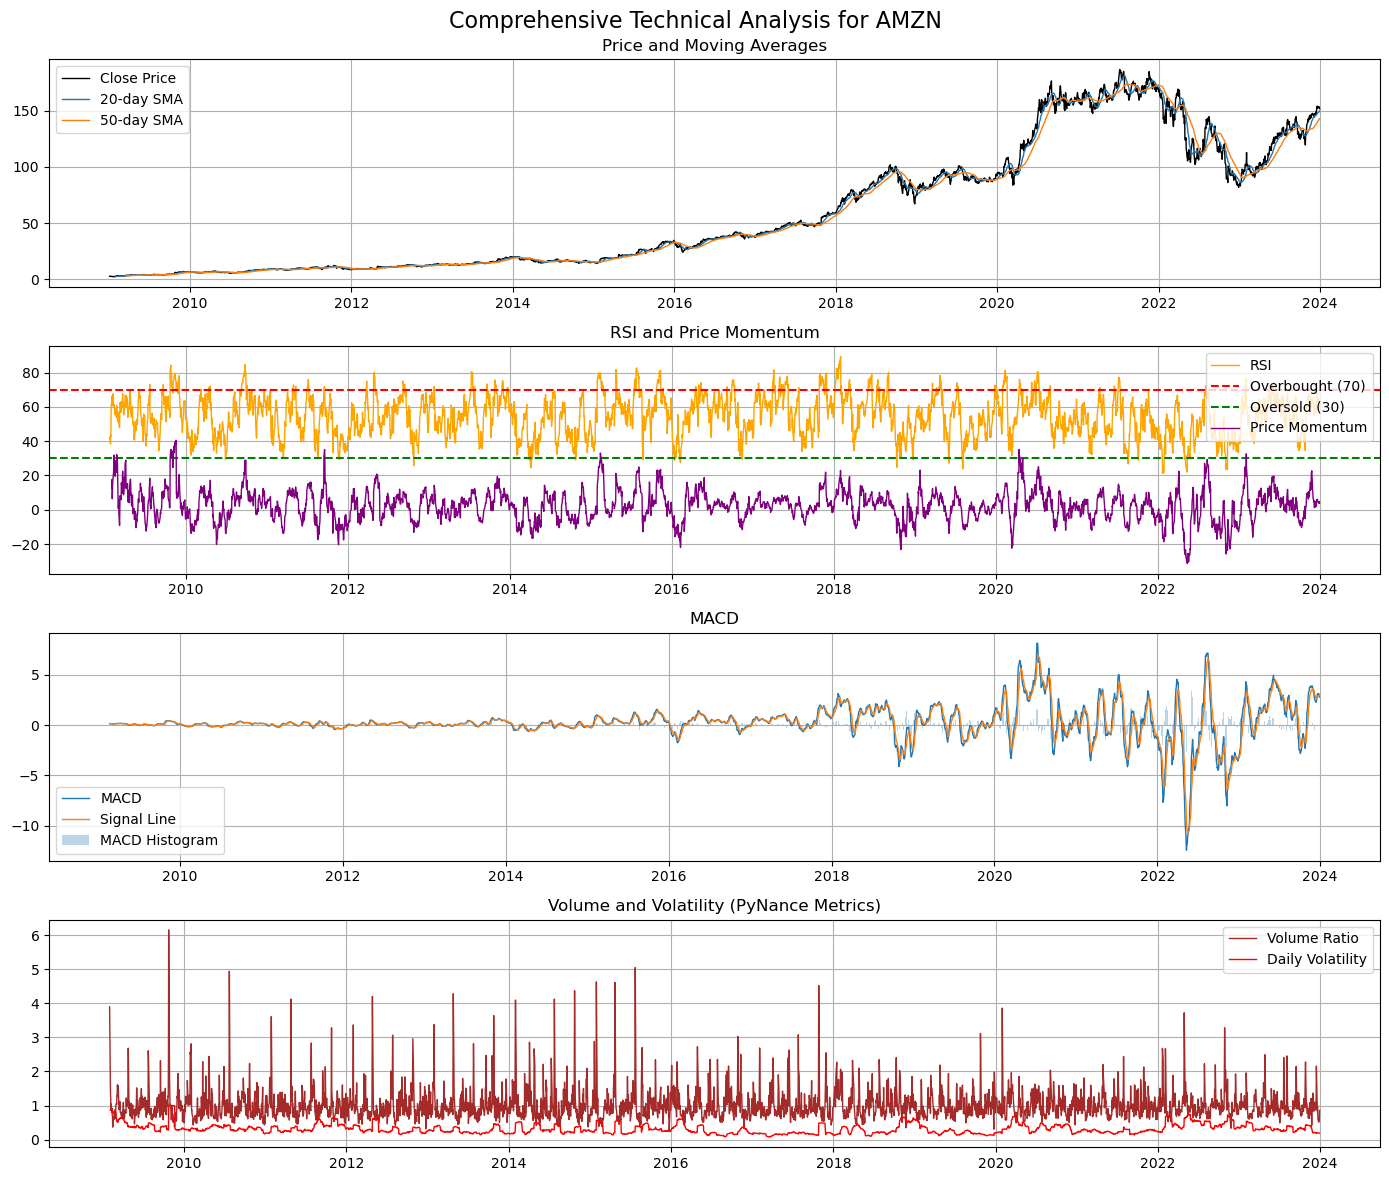

Creating comprehensive analysis for NVDA...


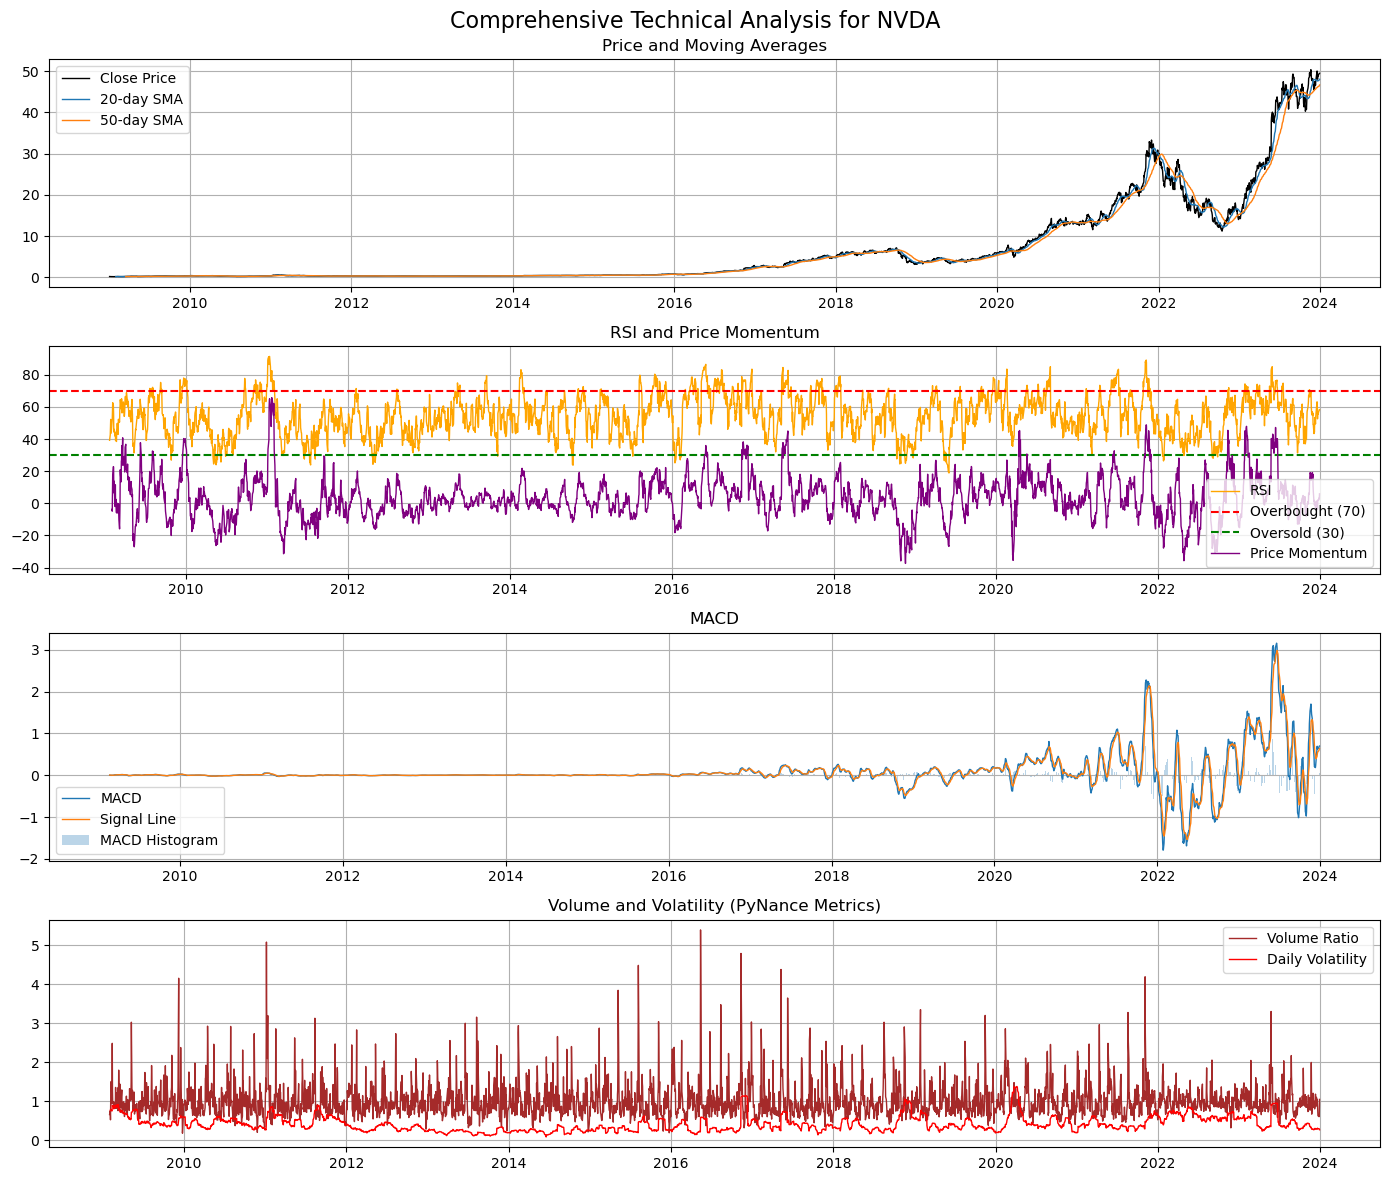

Creating comprehensive analysis for META...


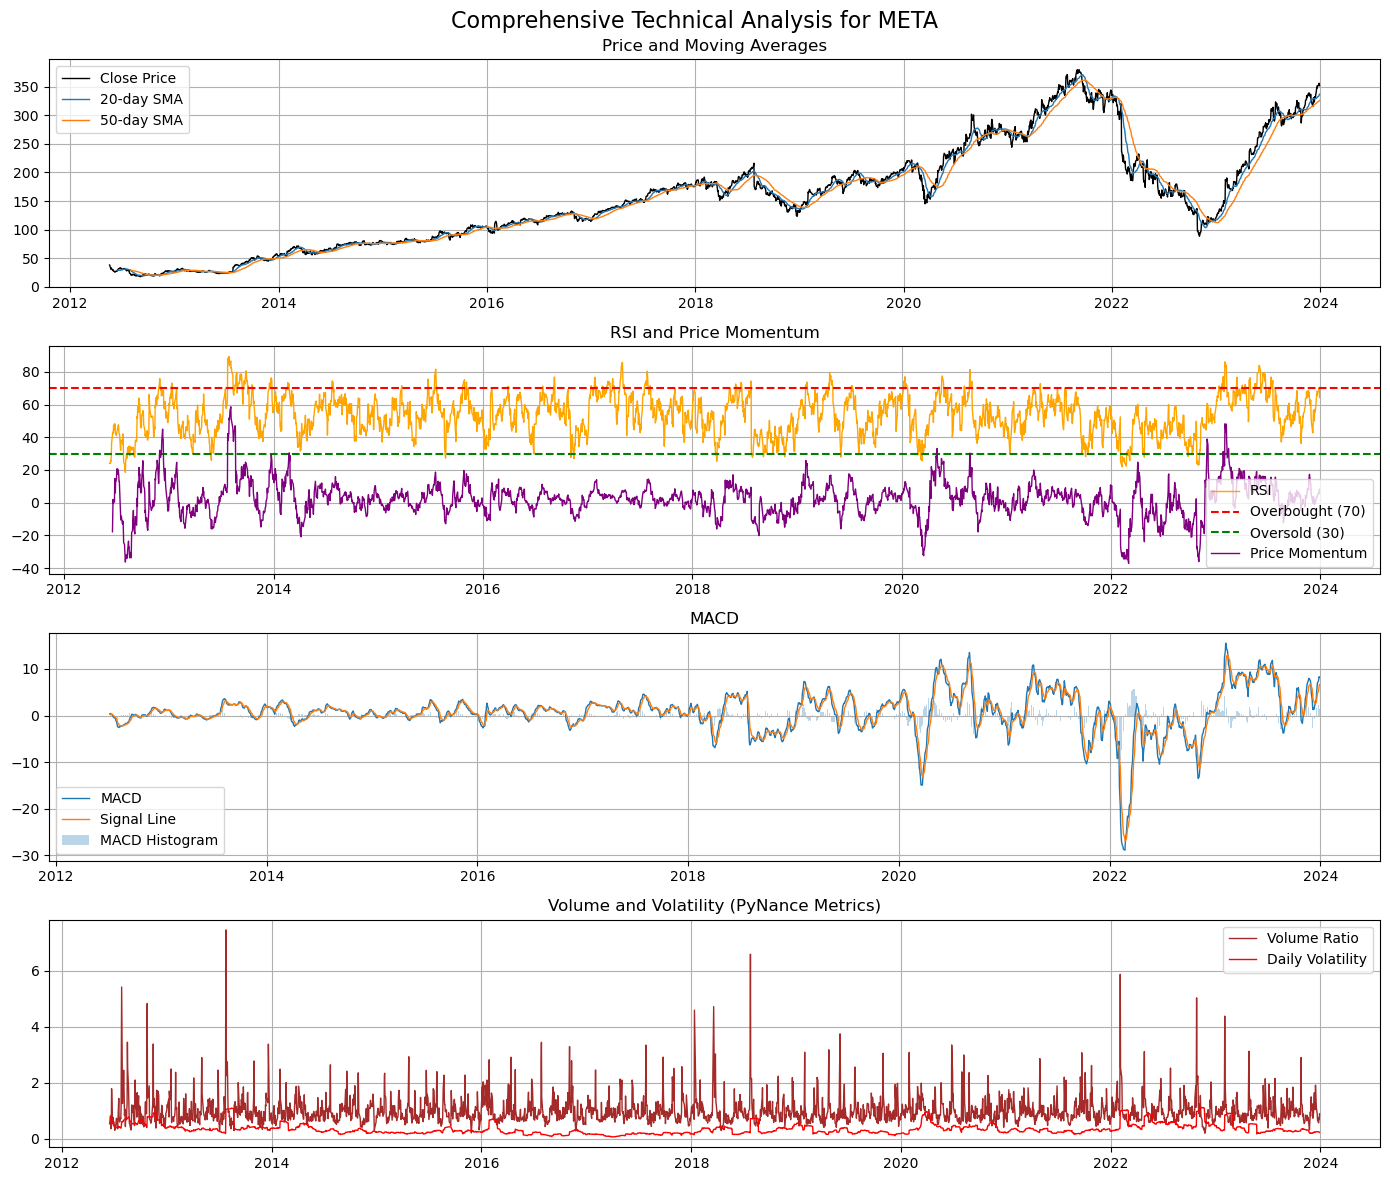

In [6]:
def plot_comprehensive_analysis(stocks, symbol="AAPL"):
    """
    Create comprehensive visualization including PyNance metrics
    """
    df = stocks[symbol]
    
    # Create subplots
    fig, axes = plt.subplots(4, 1, figsize=(14, 12))
    fig.suptitle(f'Comprehensive Technical Analysis for {symbol}', fontsize=16)
    
    # Plot 1: Price and Moving Averages
    axes[0].plot(df['Date'], df['Close'], label='Close Price', linewidth=1, color='black')
    axes[0].plot(df['Date'], df['SMA_20'], label='20-day SMA', linewidth=1)
    axes[0].plot(df['Date'], df['SMA_50'], label='50-day SMA', linewidth=1)
    axes[0].set_title('Price and Moving Averages')
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot 2: RSI and Momentum
    axes[1].plot(df['Date'], df['RSI'], label='RSI', color='orange', linewidth=1)
    axes[1].axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
    axes[1].axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
    axes[1].plot(df['Date'], df['price_momentum'], label='Price Momentum', color='purple', linewidth=1)
    axes[1].set_title('RSI and Price Momentum')
    axes[1].legend()
    axes[1].grid(True)
    
    # Plot 3: MACD
    axes[2].plot(df['Date'], df['MACD'], label='MACD', linewidth=1)
    axes[2].plot(df['Date'], df['MACD_signal'], label='Signal Line', linewidth=1)
    axes[2].bar(df['Date'], df['MACD_hist'], label='MACD Histogram', alpha=0.3)
    axes[2].set_title('MACD')
    axes[2].legend()
    axes[2].grid(True)
    
    # Plot 4: Volume and Volatility (PyNance metrics)
    axes[3].plot(df['Date'], df['volume_ratio'], label='Volume Ratio', color='brown', linewidth=1)
    axes[3].plot(df['Date'], df['daily_volatility'], label='Daily Volatility', color='red', linewidth=1)
    axes[3].set_title('Volume and Volatility (PyNance Metrics)')
    axes[3].legend()
    axes[3].grid(True)
    
    plt.tight_layout()
    plt.savefig(f'outputs/{symbol}_comprehensive_analysis.png')
    plt.show()

# Create comprehensive plots
for symbol in stocks.keys():
    print(f"Creating comprehensive analysis for {symbol}...")
    plot_comprehensive_analysis(stocks, symbol)